In [1]:
from sklearn import svm,datasets
iris=datasets.load_iris()

In [2]:
#svm not stable

from sklearn.model_selection import cross_val_score

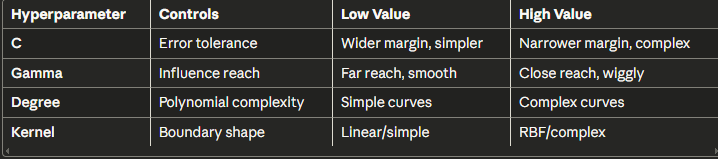

In [3]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target
df['flower']=df['flower'].apply(lambda x:iris.target_names[x])
df[47:59]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor


In [4]:
import numpy as np
kernels= ['rbf','linear']
C=[1,10,20]
average_scores={}
for kval in kernels:
    for cval in C:
        cv_scores=cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)
        average_scores[kval + ' ' +str(cval)]=np.average(cv_scores)
average_scores

{'rbf 1': np.float64(0.9800000000000001),
 'rbf 10': np.float64(0.9800000000000001),
 'rbf 20': np.float64(0.9666666666666668),
 'linear 1': np.float64(0.9800000000000001),
 'linear 10': np.float64(0.9733333333333334),
 'linear 20': np.float64(0.9666666666666666)}

In [5]:
# compared to the aboove gridsearch is better


In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_
    

{'mean_fit_time': array([0.00178332, 0.00124631, 0.00141726, 0.00130377, 0.00124211,
        0.00111909]),
 'std_fit_time': array([4.41293543e-04, 1.44241120e-04, 2.15399785e-04, 2.12092087e-04,
        3.90684763e-05, 6.30878086e-05]),
 'mean_score_time': array([0.00137167, 0.00090418, 0.0009881 , 0.00098519, 0.0009819 ,
        0.00101047]),
 'std_score_time': array([3.81050756e-04, 2.99184824e-05, 6.96663168e-05, 1.39866296e-04,
        8.34918035e-05, 2.79156307e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
 

In [8]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001783,0.000441,0.001372,0.000381,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001246,0.000144,0.000904,0.000030,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001417,0.000215,0.000988,0.000070,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001304,0.000212,0.000985,0.000140,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001242,0.000039,0.000982,0.000083,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001119,0.000063,0.001010,0.000279,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [9]:
clf.best_score_

np.float64(0.9800000000000001)

In [10]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [11]:
# when more values in C arrives , there will be computational problems to solver that we have another method
from sklearn.model_selection import RandomizedSearchCV

In [12]:
rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False,
    n_iter=2)
rs.fit(iris.data,iris.target)
rs.cv_results_

{'mean_fit_time': array([0.00262074, 0.00170197]),
 'std_fit_time': array([0.00066728, 0.00012981]),
 'mean_score_time': array([0.0019649, 0.0013927]),
 'std_score_time': array([0.00067853, 0.00018904]),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_C': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value=999999),
 'params': [{'kernel': 'rbf', 'C': 10}, {'kernel': 'linear', 'C': 20}],
 'split0_test_score': array([0.96666667, 1.        ]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.9       ]),
 'split3_test_score': array([0.96666667, 0.93333333]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98      , 0.96666667]),
 'std_test_score': array([0.01632993, 0.0421637 ]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [13]:
df=pd.DataFrame(rs.cv_results_)[['param_C']]
df

,param_C
0,10
1,20


# Using 3 algorithms

In [14]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}



In [16]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}


In [17]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}


 Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classificati 